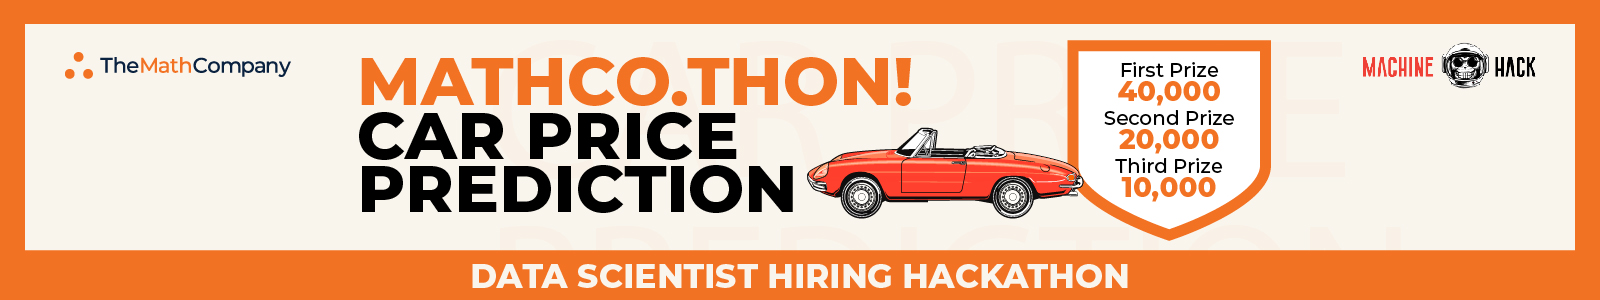

# Imports + Sanity check

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import re
from warnings import filterwarnings
filterwarnings("ignore")

In [114]:
train = pd.read_csv("https://raw.githubusercontent.com/roshankumarg529/Hackathon/master/MAchine%20hack%20MATHCOMPANY/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/roshankumarg529/Hackathon/master/MAchine%20hack%20MATHCOMPANY/test.csv")
ss = pd.read_csv("https://raw.githubusercontent.com/roshankumarg529/Hackathon/master/MAchine%20hack%20MATHCOMPANY/submission.csv")





In [84]:
train.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


In [85]:
train.shape, test.shape

((19237, 18), (8245, 18))

In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


In [88]:
train.duplicated().sum()

313

# EDA

In [127]:
data.describe(percentiles= [.01,0.25,.75,0.97,0.99])

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,is_train,Engine Type,years_passed,new1,new2,new3,new4,new5,new6,new7,new8,new10,new11,new13,new14,Mileage_AIR_SUM,cat_Mil_AIR_SUM,Prod. year_AIR_SUM,Prod. year_mil_mean
count,2.748200e+04,1.923700e+04,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,2.748200e+04,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,2.748200e+04,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,27482.000000,2.748200e+04,2.748200e+04,2.748200e+04,27482.000000,27482.000000,27482.000000,2.748200e+04
mean,4.557857e+07,1.855593e+04,636.172076,34.478677,1071.913434,2010.912452,6.278910,0.725056,3.433265,17.877192,1.468036e+06,4.593734,0.536533,0.909177,0.965468,0.076341,7.758860,6.563569,0.699985,0.100393,10.087548,2010.912452,480.672003,1.468036e+06,2003.510771,2016.499636,3.083946,4.561495,3.339422,1.704206,1.468036e+06,2.624323e+08,8.265507e+08,371.803180,127.712175,13196.977585,1.468036e+06
std,9.244972e+05,1.905813e+05,565.312040,18.736279,511.326591,5.632865,2.788632,0.446494,1.806353,12.353002,4.821110e+07,1.413918,0.895708,0.568489,0.215500,0.265548,5.364583,4.329256,0.458272,0.300529,5.632865,4.726367,538.049585,3.778084e+06,6.742341,4.925967,1.805116,1.075048,1.652786,0.721322,5.617127e+06,6.608836e+08,9.909308e+08,1055.078831,378.141722,7341.041632,1.051955e+07
min,2.074688e+07,1.000000e+00,0.000000,0.000000,0.000000,1939.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1939.000000,1.000000,2.531000e+03,1939.000000,1939.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
1%,4.219946e+07,4.500000e+01,0.000000,3.000000,80.000000,1994.000000,1.000000,0.000000,0.000000,2.000000,0.000000e+00,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1996.907895,1.000000,8.722600e+04,1986.000000,1999.000000,1.000000,4.000000,1.000000,1.000000,8.101800e+04,2.400000e+04,1.918350e+05,0.000000,0.000000,157.000000,2.010249e+04
25%,4.569808e+07,5.331000e+03,0.000000,22.000000,670.000000,2009.000000,4.000000,0.000000,2.000000,3.000000,7.050100e+04,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,6.000000,2010.240196,49.000000,1.688670e+05,1999.000000,2016.000000,2.000000,4.000000,2.000000,1.000000,1.274250e+05,2.720000e+05,4.500000e+05,8.000000,6.000000,6003.000000,1.389905e+05
50%,4.577207e+07,1.317200e+04,642.000000,33.000000,1049.000000,2012.000000,7.000000,1.000000,5.000000,18.000000,1.266130e+05,4.000000,0.000000,1.000000,1.000000,0.000000,7.000000,6.000000,1.000000,0.000000,9.000000,2012.500000,239.000000,1.196502e+06,2004.000000,2018.000000,3.000000,4.000000,4.000000,2.000000,1.852820e+05,4.134740e+05,5.555551e+06,44.000000,16.000000,13928.000000,1.701362e+05
75%,4.580197e+07,2.207500e+04,917.000000,56.000000,1527.000000,2015.000000,9.000000,1.000000,5.000000,25.000000,1.897040e+05,4.000000,1.000000,1.000000,1.000000,0.000000,12.000000,12.000000,1.000000,0.000000,12.000000,2013.728043,760.000000,1.936443e+06,2008.000000,2020.000000,4.000000,5.000000,4.000000,2.000000,1.013092e+06,1.678000e+06,2.147484e+09,279.000000,97.000000,21159.000000,8.897004e+05
97%,4.581526e+07,5.750068e+04,1750.000000,64.000000,1900.570000,2018.000000,9.000000,1.000000,5.000000,46.000000,3.773790e+05,8.000000,3.000000,2.000000,1.000000,1.000000,14.000000,12.000000,1.000000,1.000000,23.000000,2016.000000,1557.000000,5.780988e+06,2015.000000,2020.000000,8.000000,8.000000,6.000000,3.000000,9.989912e+06,2.147484e+09,2.147484e+09,5592.000000,898.000000,21842.000000,8.367060e+06
99%,4.581615e+07,8.467500e+04,2225.000000

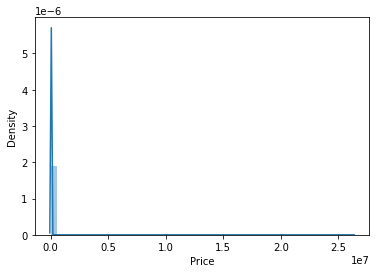

In [132]:
sns.distplot(train['Price'] )


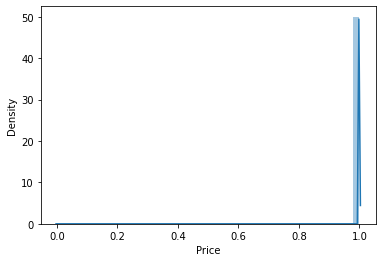

In [133]:
sns.distplot(train['Price'] <26307500)

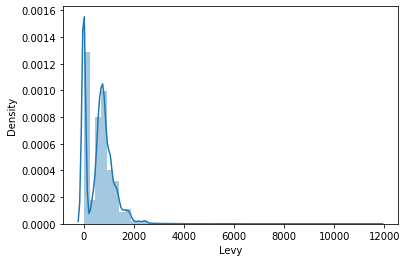

In [129]:
sns.distplot(data['Levy'])


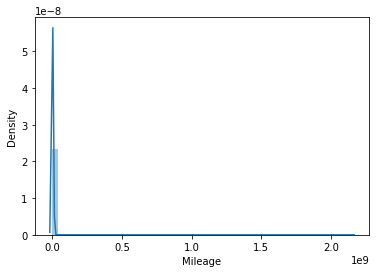

In [130]:
sns.distplot(data['Mileage'])


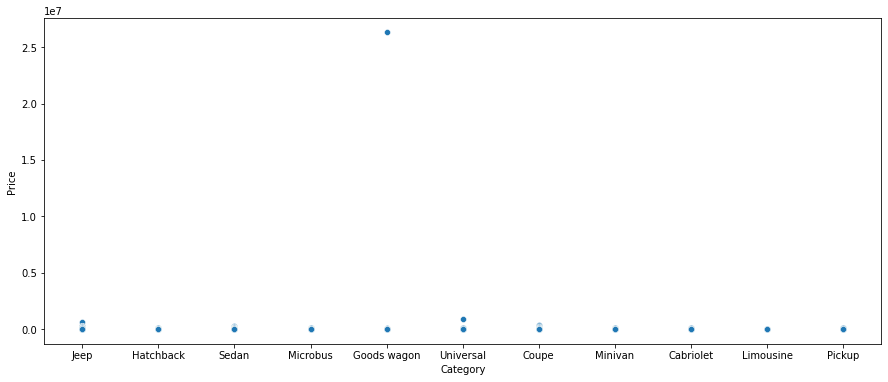

In [115]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Category',y='Price',data = train)

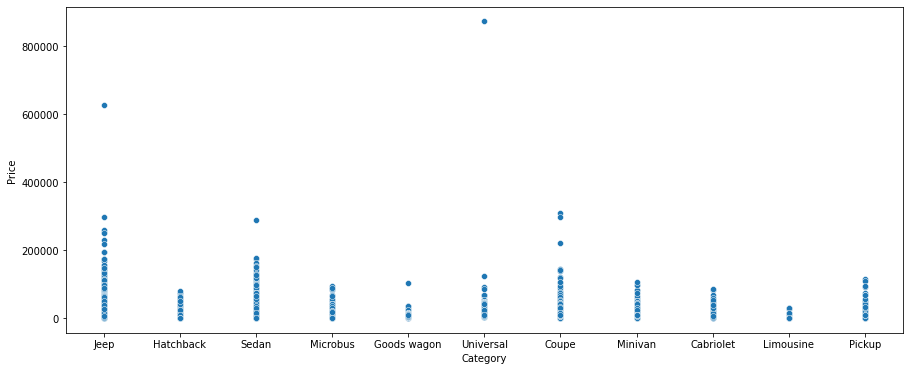

In [122]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Category',y='Price',data = train[train['Price']< 26307500] )

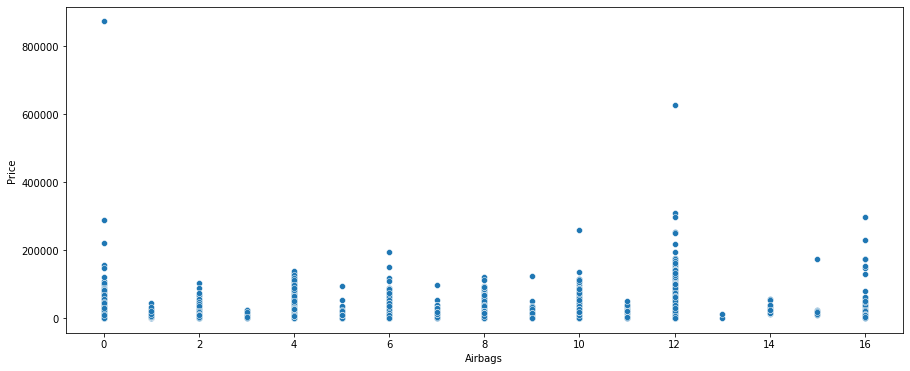

In [134]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Airbags',y='Price',data = data[data['Price']< 26307500])

In [145]:
data.corr()[['Price']]

,Price
ID,-0.000844
Price,1.000000
Levy,-0.003701
Manufacturer,-0.003893
Model,0.000849
Prod. year,0.012982
Category,-0.019721
Leather interior,0.000754
Fuel type,-0.012419
Engine volume,0.007698


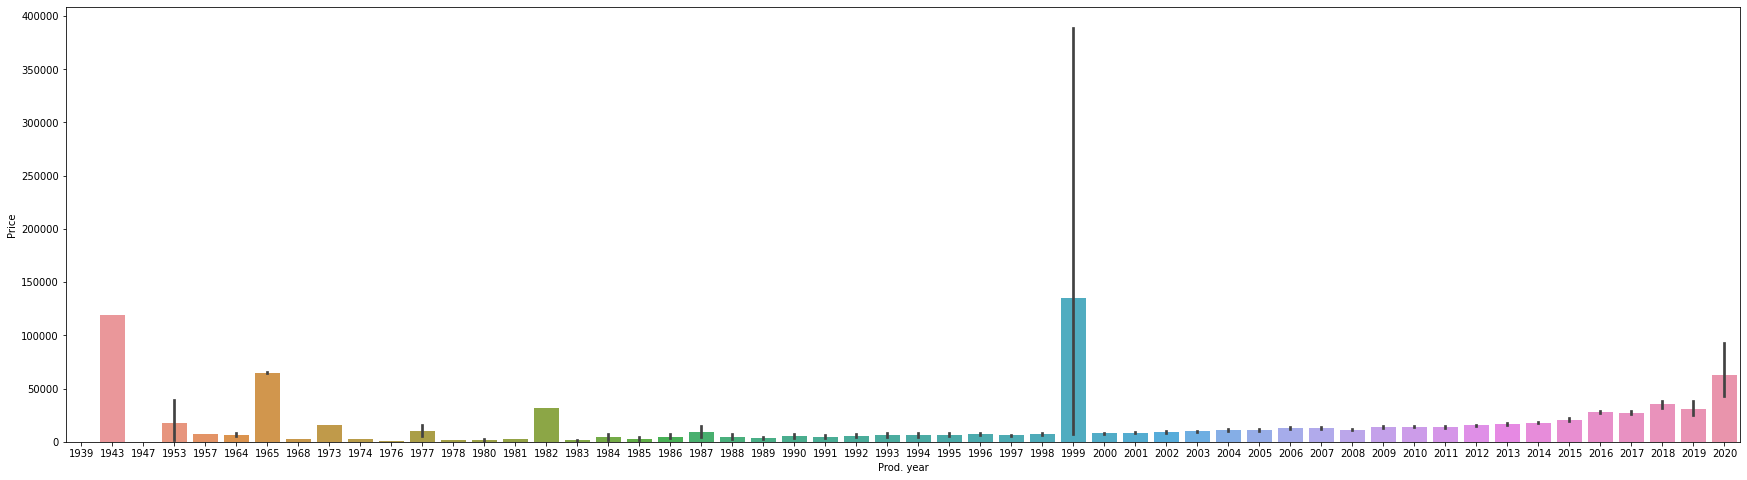

In [151]:
plt.figure(figsize= (30,8))
sns.barplot(x = train['Prod. year'], y = train['Price'])

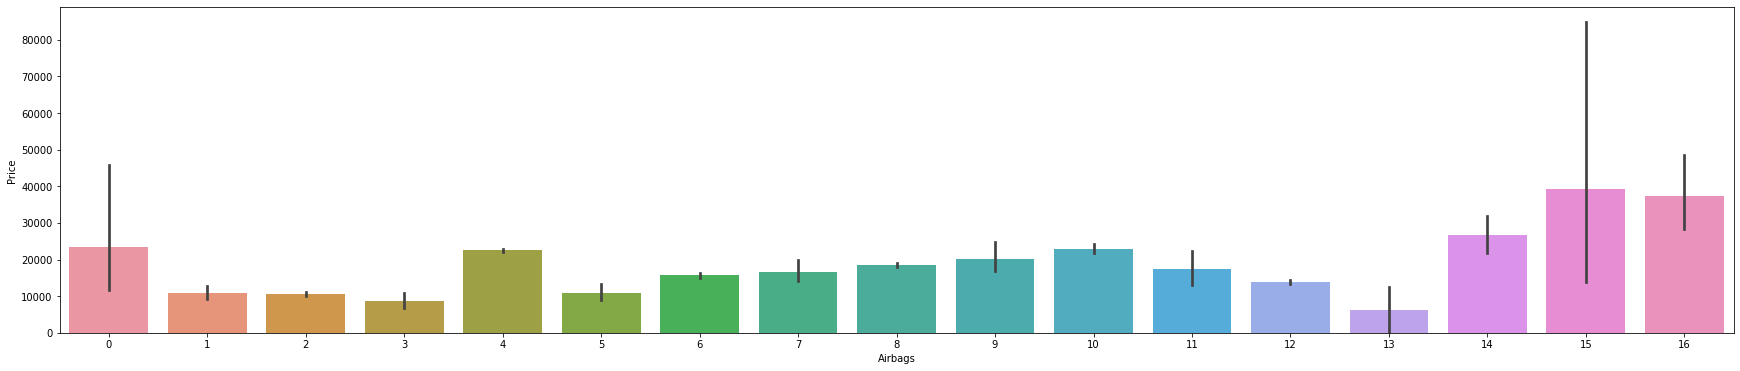

In [153]:
plt.figure(figsize= (30,6))
sns.barplot(x = train['Airbags'], y = train['Price'])

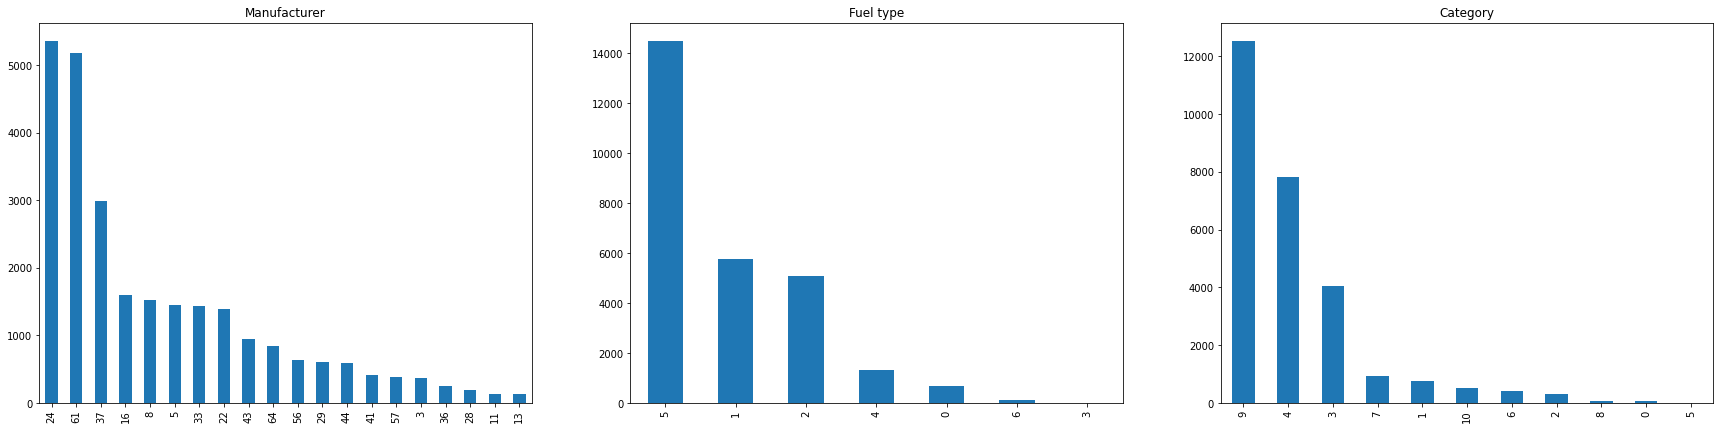

In [176]:
plt.figure(figsize=(30, 7))

plt.subplot(1,3,1)
data['Manufacturer'].value_counts()[:20].plot(kind='bar')
plt.title("Manufacturer")

plt.subplot(1,3,2)
data['Fuel type'].value_counts().plot(kind='bar')
plt.title("Fuel type")

plt.subplot(1,3,3)
data['Category'].value_counts().plot(kind='bar')
plt.title("Category")

plt.show()

In [169]:
print(train[train['Price']== 26307500][['ID']])
test[test['ID'] == 45812886]


             ID
16983  45812886


,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price


In [166]:
print(data[data['Levy'] > 11000 ][['ID']])
test[test['ID'] == 45221191]

             ID
115    45534351
18957  44674964
18984  45221191


,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price


# Preprocess

In [89]:
train['is_train'] = 1
test['is_train'] = 0
data = pd.concat([train,test])


In [90]:
def preprocess(data):
  
  data['Engine Type']=['Non-turbo' if len(i)== 1 else 'Turbo' for i in data['Engine volume'].str.split()]
  data['Engine volume']=data['Engine volume'].str.replace('Turbo','')

  data['Mileage'] = [re.sub('\D', '', str(x)) for x in data['Mileage']]
  data['Engine volume'] = [re.sub('\D', '', str(x)) for x in data['Engine volume']]
  data['Levy'] = data['Levy'].replace("-",np.nan)
  data['Engine volume'] = data['Engine volume'].astype('int') 
  data['Mileage'] = data['Mileage'].astype('int') 
  data['Levy'] = pd.to_numeric(data['Levy'], errors='coerce')
  data['Levy'] = data['Levy'].fillna(0)

  
  return data




In [91]:

data = preprocess(data)
data.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,is_train,Engine Type
0,45654403,13328.0,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,35,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,1,Non-turbo
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,1,Non-turbo


# Encoding



In [92]:

def encode(data):
  LE = LabelEncoder() 

  encode_col =    data.select_dtypes(include=['object']).columns.to_list()  
  for col in encode_col:
    data[col] = LE.fit_transform(data[col])
  return data

data = encode(data)
data.shape

(27482, 20)

# Feature Engineering 

In [93]:
data['years_passed'] = 2021 - data['Prod. year']
data['new1'] = data.groupby(['Manufacturer','Model','Category'])['Prod. year'].transform('mean')
data['new2'] = data.groupby(['Manufacturer','Model'])['Prod. year'].transform('count')
data['new3'] = round(data.groupby(['Manufacturer'])['Mileage'].transform('mean'))
data['new4'] = data.groupby(['Manufacturer','Model','Category'])['Prod. year'].transform('min')
data['new5'] = data.groupby(['Manufacturer','Model','Category'])['Prod. year'].transform('max')
data['new6'] = data.groupby(['Manufacturer','Model','Category'])['Cylinders'].transform('nunique')
data['new7'] = round(data.groupby(['Manufacturer','Model','Category'])['Cylinders'].transform('mean'))
data['new8'] = round(data.groupby(['Manufacturer','Model','Category'])['Cylinders'].transform('min'))
data['new10'] = data.groupby(['Manufacturer','Model','Category'])['Doors'].transform('nunique')
data['new11'] = round(data.groupby(['Manufacturer','Category'])['Mileage'].transform('mean'))
data['new13'] = round(data.groupby(['Manufacturer','Model','Category'])['Mileage'].transform('max'))
data['new14'] = round(data.groupby(['Manufacturer','Category'])['Mileage'].transform('max'))
data['Mileage_AIR_SUM'] = data.groupby(['Mileage'])['Airbags'].transform('sum')
data['cat_Mil_AIR_SUM'] = data.groupby(['Category','Mileage'])['Airbags'].transform('sum')
#data['Prod. year_mil_SUM'] = data.groupby(['Prod. year'])['Mileage'].transform('sum')
data['Prod. year_AIR_SUM'] = data.groupby(['Prod. year'])['Airbags'].transform('sum')
data['Prod. year_mil_mean'] = data.groupby(['Prod. year'])['Mileage'].transform('mean')





# Outliers clean

In [94]:
train = data[data['is_train'] == 1]
test  = data[data['is_train'] == 0]



def outlier(df):
  df = df[df['Levy'] <= 11000 ]
  df = df[df['Price']<  	26307500]
  #df = df[df['Mileage']< 400000]
  return df

train = outlier(train)



In [ ]:
#train = train.drop_duplicates()

In [8]:
def rmlse(actual,pred):
  return np.sqrt(mean_squared_log_error(actual, abs(pred)))

In [95]:
print(data.columns)


Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'is_train', 'Engine Type', 'years_passed', 'new1', 'new2',
       'new3', 'new4', 'new5', 'new6', 'new7', 'new8', 'new10', 'new11',
       'new13', 'new14', 'Mileage_AIR_SUM', 'cat_Mil_AIR_SUM',
       'Prod. year_AIR_SUM', 'Prod. year_mil_mean'],
      dtype='object')


# LGBM CV

In [96]:

train_cols =   [ 'ID','Levy', 'Manufacturer', 'Model', 'Prod. year',
                'Category', 'Leather interior', 'Fuel type', 'Mileage',
                'Engine volume','Gear box type',  'Color', 'Airbags','Engine Type', 
                'new1', 'new2','new3', 'new4', 'new5','new6','new7', 'new8',
                'Mileage_AIR_SUM','Prod. year_AIR_SUM','Prod. year_mil_mean'
                ]
                     
      

X = train[train_cols]
y = np.log1p(train['Price'])


lgb = LGBMRegressor(n_estimators = 1000,num_boost_round=2000,categorical_feature = [7,10,11,12,13], max_depth= 15,num_leaves = 32,colsample_bytree= 1,reg_alpha= 1,reg_lambda=1.1, random_state = 42, n_jobs= -1)

model = lgb
        
fold = KFold(n_splits = 5, random_state= 42)
pred = [];score_train =[];score_test =[]
i = 1

for train_index , test_index in fold.split(X,y):
    print("fold"+ str(i))
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train, eval_set = (X_test, y_test), early_stopping_rounds = 100, verbose = 0)

    y_pred = abs(model.predict(X_test))
    y_pred_train = abs(model.predict(X_train))

    y_pred = np.exp(y_pred)
    y_train = np.exp(y_train)
    y_pred_train = np.exp(y_pred_train)
    y_test = np.exp(y_test)

    score_test.append(np.sqrt(mean_squared_log_error( y_test,y_pred)))
    print("test_score : " + str(np.sqrt(mean_squared_log_error( y_test,y_pred))))
    print("train_score : " + str(round(np.sqrt(mean_squared_log_error(  y_train,y_pred_train)),6)))

    score_train.append(np.sqrt(mean_squared_log_error( y_train,y_pred_train)))
    i = i+1
print('Test mean RMLSE :',np.mean(score_test))
print('Train mean RMLSE :',np.mean(score_train))

fold1
test_score : 0.8277211024250197
train_score : 0.297423
fold2
test_score : 0.8759714288549773
train_score : 0.305575
fold3
test_score : 0.8538632956898545
train_score : 0.276061
fold4
test_score : 0.8445473833860895
train_score : 0.30184
fold5
test_score : 0.8266082698584754
train_score : 0.290545
Test mean RMLSE : 0.8457422960428833
Train mean RMLSE : 0.2942887578380968


### Track CV LGBM

In [ ]:

Test mean RMLSE : 0.8457422960428833        #+ 'Prod. year_AIR_SUM' , 'Prod. year_mil_mean'
Train mean RMLSE : 0.2942887578380968

Test mean RMLSE : 0.8477098244207788          #+ 'Prod. year_AIR_SUM'
Train mean RMLSE : 0.2643479578359665   

Test mean RMLSE : 0.8486653482919178
Train mean RMLSE : 0.28638588919189223




# Extra Trees CV

In [97]:

train_cols =  ['ID','Levy', 'Manufacturer', 'Model', 'Prod. year',
                'Category', 'Leather interior', 'Fuel type', 'Mileage','Engine volume',
                 'Gear box type',  'Color',  'Airbags','Engine Type', 'years_passed',
                'new1', 'new2','new3', 'new4', 'new5','new6','new7', 'new8',
                'new10','new11', 'new13', 'new14','Mileage_AIR_SUM','cat_Mil_AIR_SUM' 
              ]



X = train[train_cols]
y = np.log1p(train['Price'])

et = ExtraTreesRegressor(bootstrap=True,  random_state = 42)
model = et
        
fold = KFold(n_splits = 5, random_state= 42)
pred = [];score_train =[];score_test =[]
i = 1

for train_index , test_index in fold.split(X,y):
    print("fold"+ str(i))
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)

    y_pred = abs(model.predict(X_test))
    y_pred_train = abs(model.predict(X_train))

    y_pred = np.exp(y_pred)
    y_train = np.exp(y_train)
    y_pred_train = np.exp(y_pred_train)
    y_test = np.exp(y_test)

    score_test.append(np.sqrt(mean_squared_log_error( y_test,y_pred)))
    print("test_score : " + str(np.sqrt(mean_squared_log_error( y_test,y_pred))))
    print("train_score : " + str(round(np.sqrt(mean_squared_log_error(  y_train,y_pred_train)),6)))

    score_train.append(np.sqrt(mean_squared_log_error( y_train,y_pred_train)))
    i = i+1
print('Test mean RMLSE :',np.mean(score_test))
print('Train mean RMLSE :',np.mean(score_train))

fold1
test_score : 0.8191035840236247
train_score : 0.320902
fold2
test_score : 0.8760680573453369
train_score : 0.317532
fold3
test_score : 0.8315553813372899
train_score : 0.321468
fold4
test_score : 0.8468261506746438
train_score : 0.320349
fold5
test_score : 0.8728747825924531
train_score : 0.316611
Test mean RMLSE : 0.8492855911946698
Train mean RMLSE : 0.3193722624324706


### Track CV ET

In [ ]:

Test mean RMLSE : 0.8479430825647917        # + cat_Mil_AIR_SUM + 'Prod. year_AIR_SUM'   --- LB not working
Train mean RMLSE : 0.31869031069953935

Test mean RMLSE : 0.8492855911946698        # + cat_Mil_AIR_SUM
Train mean RMLSE : 0.3193722624324706

Test mean RMLSE : 0.8521288360851471
Train mean RMLSE : 0.31871401263688304


# Random forest CV

In [98]:

train_cols =    [ 'ID','Levy', 'Manufacturer', 'Model', 'Prod. year',
                'Category', 'Leather interior', 'Fuel type', 'Mileage','Engine volume',
                 'Gear box type',  'Color', 'Airbags','Engine Type', 'years_passed', 
                 'new1', 'new2','new3', 'new4', 'new5','new6','new7','Mileage_AIR_SUM' 
                ]


X = train[train_cols]
y = np.log1p(train['Price'])


rf  = RandomForestRegressor( random_state= 42)

model = rf
        
fold = KFold(n_splits = 5, random_state= 42)
pred = [];score_train =[];score_test =[]
i = 1

for train_index , test_index in fold.split(X,y):
    print("fold"+ str(i))
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)

    y_pred = abs(model.predict(X_test))
    y_pred_train = abs(model.predict(X_train))

    y_pred = np.exp(y_pred)
    y_train = np.exp(y_train)
    y_pred_train = np.exp(y_pred_train)
    y_test = np.exp(y_test)

    score_test.append(np.sqrt(mean_squared_log_error( y_test,y_pred)))
    print("test_score : " + str(np.sqrt(mean_squared_log_error( y_test,y_pred))))
    print("train_score : " + str(round(np.sqrt(mean_squared_log_error(  y_train,y_pred_train)),6)))

    score_train.append(np.sqrt(mean_squared_log_error( y_train,y_pred_train)))
    i = i+1
print('Test mean RMLSE :',np.mean(score_test))
print('Train mean RMLSE :',np.mean(score_train))

fold1
test_score : 0.82206622922689
train_score : 0.32116
fold2
test_score : 0.880096626252364
train_score : 0.31881
fold3
test_score : 0.8657716847295553
train_score : 0.323226
fold4
test_score : 0.868028371520265
train_score : 0.323216
fold5
test_score : 0.8540847491552924
train_score : 0.32386
Test mean RMLSE : 0.8580095321768735
Train mean RMLSE : 0.3220542580406674


### Track CV RF

In [ ]:

Test mean RMLSE : 0.8580095321768735        #-new11
Train mean RMLSE : 0.3220542580406674

Test mean RMLSE : 0.8581387005836969       #+Prod. year_AIR_SUM
Train mean RMLSE : 0.32210141296547345

Test mean RMLSE : 0.8585872967333534
Train mean RMLSE : 0.32232727041424614


# SUBMISSION

### ET

In [104]:

et = ExtraTreesRegressor(bootstrap=True,  random_state = 42)

train_cols =  ['ID','Levy', 'Manufacturer', 'Model', 'Prod. year',
                'Category', 'Leather interior', 'Fuel type', 'Mileage','Engine volume',
                 'Gear box type',  'Color',  'Airbags','Engine Type', 'years_passed',
                'new1', 'new2','new3', 'new4', 'new5','new6','new7', 'new8',
                'new10','new11', 'new13', 'new14','Mileage_AIR_SUM','cat_Mil_AIR_SUM' 
              ]


X = train[train_cols]
y = np.log1p(train['Price'])


et.fit(X,y)
pred = et.predict(test[train_cols])

### RF

In [ ]:

train_cols =    [ 'ID','Levy', 'Manufacturer', 'Model', 'Prod. year',
                'Category', 'Leather interior', 'Fuel type', 'Mileage','Engine volume',
                 'Gear box type',  'Color', 'Airbags','Engine Type', 'years_passed', 
                 'new1', 'new2','new3', 'new4', 'new5','new6','new7','Mileage_AIR_SUM' 
                ]
                   
rf  = RandomForestRegressor( random_state= 42)


X = train[train_cols]
y = np.log1p(train['Price'])


rf.fit(X,y)
pred1 = rf.predict(test[train_cols])



### LGBM

In [101]:
train_cols =   [ 'ID','Levy', 'Manufacturer', 'Model', 'Prod. year',
                'Category', 'Leather interior', 'Fuel type', 'Mileage',
                'Engine volume','Gear box type',  'Color', 'Airbags','Engine Type', 
                'new1', 'new2','new3', 'new4', 'new5','new6','new7', 'new8',
                'Mileage_AIR_SUM','Prod. year_AIR_SUM','Prod. year_mil_mean'
                ]
                     
       
lgb = LGBMRegressor(n_estimators = 1000,num_boost_round=2000,categorical_feature = [7,10,11,12,13], max_depth= 15,
                    num_leaves = 32,colsample_bytree= 1,reg_alpha= 1,reg_lambda=1.1, random_state = 42, n_jobs= -1)

X = train[train_cols]
y = np.log1p(train['Price'])

lgb.fit(X,y)
pred2 = lgb.predict(test[train_cols])

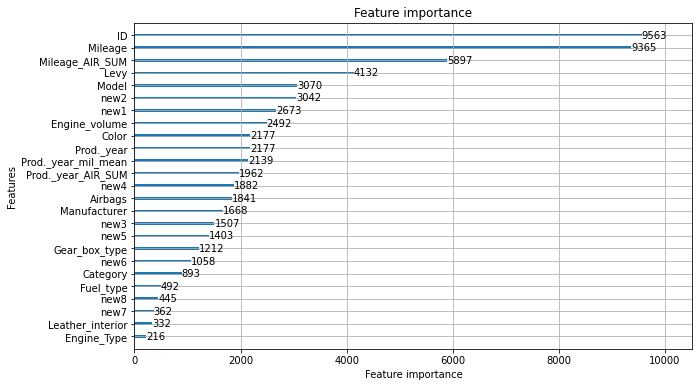

In [102]:
import lightgbm
lightgbm.plot_importance(lgb,figsize = (10,6))

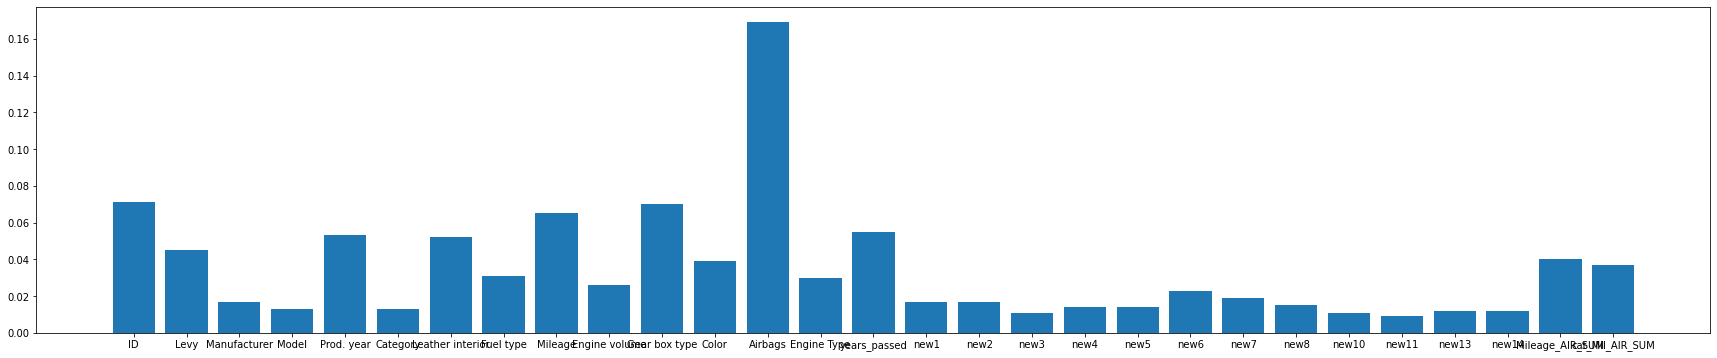

In [105]:
imp = round(pd.Series(et.feature_importances_),3)

plt.figure(figsize = (30,6))
plt.bar(X.columns, imp)
plt.show()

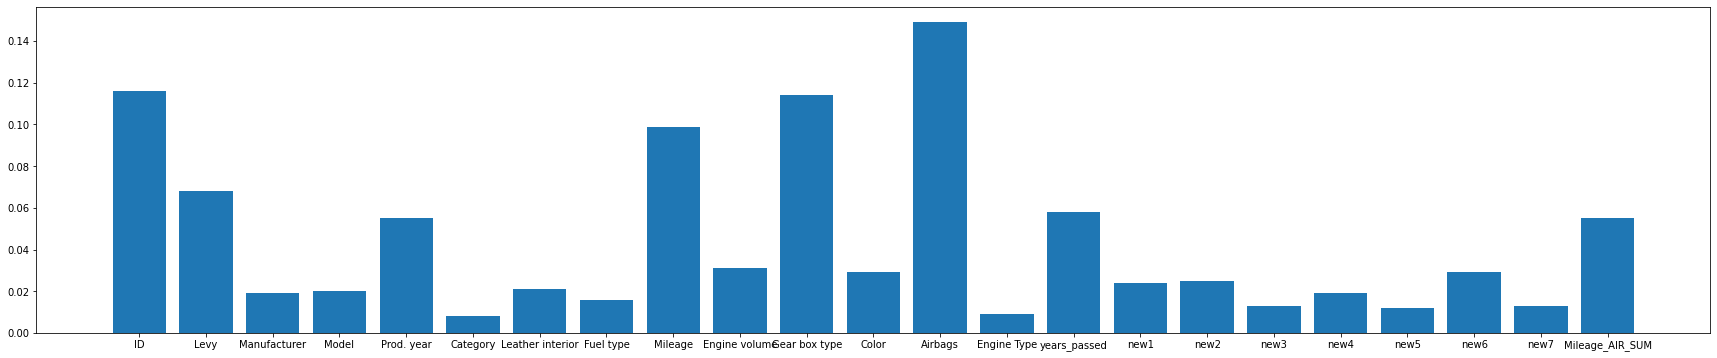

In [112]:
imp = round(pd.Series(rf.feature_importances_),3)

plt.figure(figsize = (30,6))
plt.bar(X.columns, imp)
plt.show()

In [109]:
test['Price_et'] = np.exp(pred)
test['Price_rf'] = np.exp(pred1)
test['Price_lgbm'] = np.exp(pred2)

test['final'] = (0.35 * test['Price_et']) + (0.45 * test['Price_rf'])+ (0.2 * test['Price_lgbm'])
test.head(3)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,is_train,Engine Type,years_passed,new1,new2,new3,new4,new5,new6,new7,new8,new10,new11,new13,new14,Mileage_AIR_SUM,cat_Mil_AIR_SUM,Prod. year_AIR_SUM,Prod. year_mil_mean,Price_et,Price_rf,Price_lgbm,final
0,44020629,NaN,0.0,64,1022,2012,3,0,1,20,0,4.0,1,1,0,0,7,10,0,1,9,2001.437500,95,3853764.0,1988,2015,4,4.0,1.0,2,8680931.0,999999999,999999999,5592,898,21842,1.544389e+05,9634.645880,11253.784409,5454.397901,9527.208622
1,45784798,NaN,0.0,24,1657,2012,9,1,5,24,26000,4.0,2,1,1,0,7,10,0,0,9,2014.076574,1557,549053.0,1999,2020,5,4.0,1.0,2,883518.0,2147483647,2147483647,138,82,21842,1.544389e+05,8672.528346,9457.198621,3099.733715,7911.071044
2,45800257,NaN,0.0,43,1751,2005,9,0,5,15,168000,4.0,0,1,1,1,13,8,0,0,16,2005.923077,101,2367822.0,2005,2012,1,4.0,4.0,1,139216.0,243075,1788888,287,163,3001,3.947054e+06,6891.723429,5827.726529,8495.405614,6733.661261


In [110]:
ss['Price'] = round(abs(test['final']),4)
ss.to_csv("blend.csv",index = None)


In [111]:
ss.head()

,Price
0,9527.2086
1,7911.0710
2,6733.6613
3,6209.7065
4,3038.1799
